In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)

if PATH not in sys.path:
    sys.path.append(PATH)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from BusinessAnalyticsProject.dataset.feature_engineering import join_tables
from BusinessAnalyticsProject.dataset.eda import count_missing_values

In [4]:
sns.set_theme()

## Feature Engineering

In [9]:
train_df = join_tables(
    "../data/raw/train.csv",
    "../data/raw/features.csv",
    "../data/raw/stores.csv",
    # save_path="../data/processed/all_train.csv"
)
train_df

D:\testings\Python\TestingPython\BusinessAnalyticsProject\dataset\feature_engineering.py:39: RuntimeWarning: Mean of empty slice
  features_df["MarkDownMean"] = np.nanmean(markdown_cols.values, axis=1)
D:\python\venvs\BusinessAnalytics\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Weight,MarkDownMean,MarkDownStd,Is_super_bowl,Is_labor_day,Is_thanks_giving,Is_chrismas
0,1,1,2010-02-05,24924.50,False,5.727778,2.572,NaN,NaN,NaN,...,8.106,A,151315,1,NaN,NaN,False,False,False,False
143,1,2,2010-02-05,50605.27,False,5.727778,2.572,NaN,NaN,NaN,...,8.106,A,151315,1,NaN,NaN,False,False,False,False
286,1,3,2010-02-05,13740.12,False,5.727778,2.572,NaN,NaN,NaN,...,8.106,A,151315,1,NaN,NaN,False,False,False,False
429,1,4,2010-02-05,39954.04,False,5.727778,2.572,NaN,NaN,NaN,...,8.106,A,151315,1,NaN,NaN,False,False,False,False
572,1,5,2010-02-05,32229.38,False,5.727778,2.572,NaN,NaN,NaN,...,8.106,A,151315,1,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421012,45,93,2012-10-26,2487.80,False,14.916667,3.882,4018.91,58.08,100.0,...,8.667,B,118221,1,1049.452,1512.607836,False,False,False,False
421146,45,94,2012-10-26,5203.31,False,14.916667,3.882,4018.91,58.08,100.0,...,8.667,B,118221,1,1049.452,1512.607836,False,False,False,False
421289,45,95,2012-10-26,56017.47,False,14.916667,3.882,4018.91,58.08,100.0,...,8.667,B,118221,1,1049.452,1512.607836,False,False,False,False
421434,45,97,2012-10-26,6817.48,False,14.916667,3.882,4018.91,58.08,100.0,...,8.667,B,118221,1,1049.452,1512.607836,False,False,False,False


In [10]:
test_df = join_tables(
    "../data/raw/test.csv",
    "../data/raw/features.csv",
    "../data/raw/stores.csv",
    # save_path="../data/processed/all_test.csv"
)
test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,Weight,MarkDownMean,MarkDownStd,Is_super_bowl,Is_labor_day,Is_thanks_giving,Is_chrismas
0,1,1,2012-11-02,False,12.955556,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,1,3668.456,2268.946953,False,False,False,False
39,1,2,2012-11-02,False,12.955556,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,1,3668.456,2268.946953,False,False,False,False
78,1,3,2012-11-02,False,12.955556,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,1,3668.456,2268.946953,False,False,False,False
117,1,4,2012-11-02,False,12.955556,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,1,3668.456,2268.946953,False,False,False,False
156,1,5,2012-11-02,False,12.955556,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,1,3668.456,2268.946953,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114907,45,93,2013-07-26,False,24.477778,3.804,212.02,851.73,2.06,10.88,...,NaN,B,118221,1,588.252,709.498175,False,False,False,False
114946,45,94,2013-07-26,False,24.477778,3.804,212.02,851.73,2.06,10.88,...,NaN,B,118221,1,588.252,709.498175,False,False,False,False
114985,45,95,2013-07-26,False,24.477778,3.804,212.02,851.73,2.06,10.88,...,NaN,B,118221,1,588.252,709.498175,False,False,False,False
115024,45,97,2013-07-26,False,24.477778,3.804,212.02,851.73,2.06,10.88,...,NaN,B,118221,1,588.252,709.498175,False,False,False,False


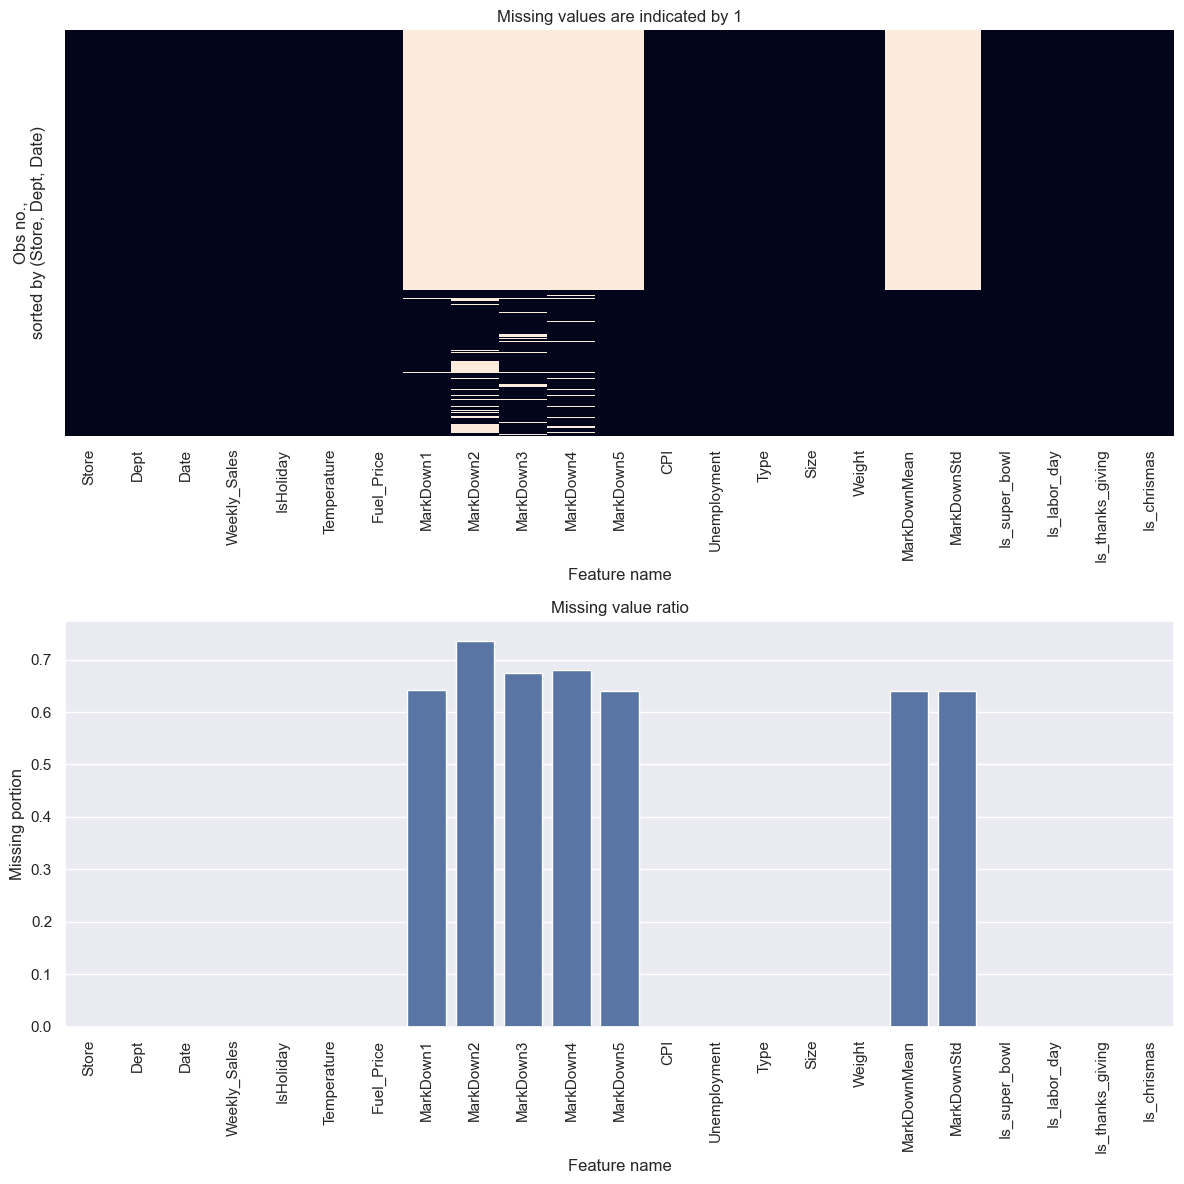

In [11]:
missing_vals_ratio, fig, axes = count_missing_values(train_df)

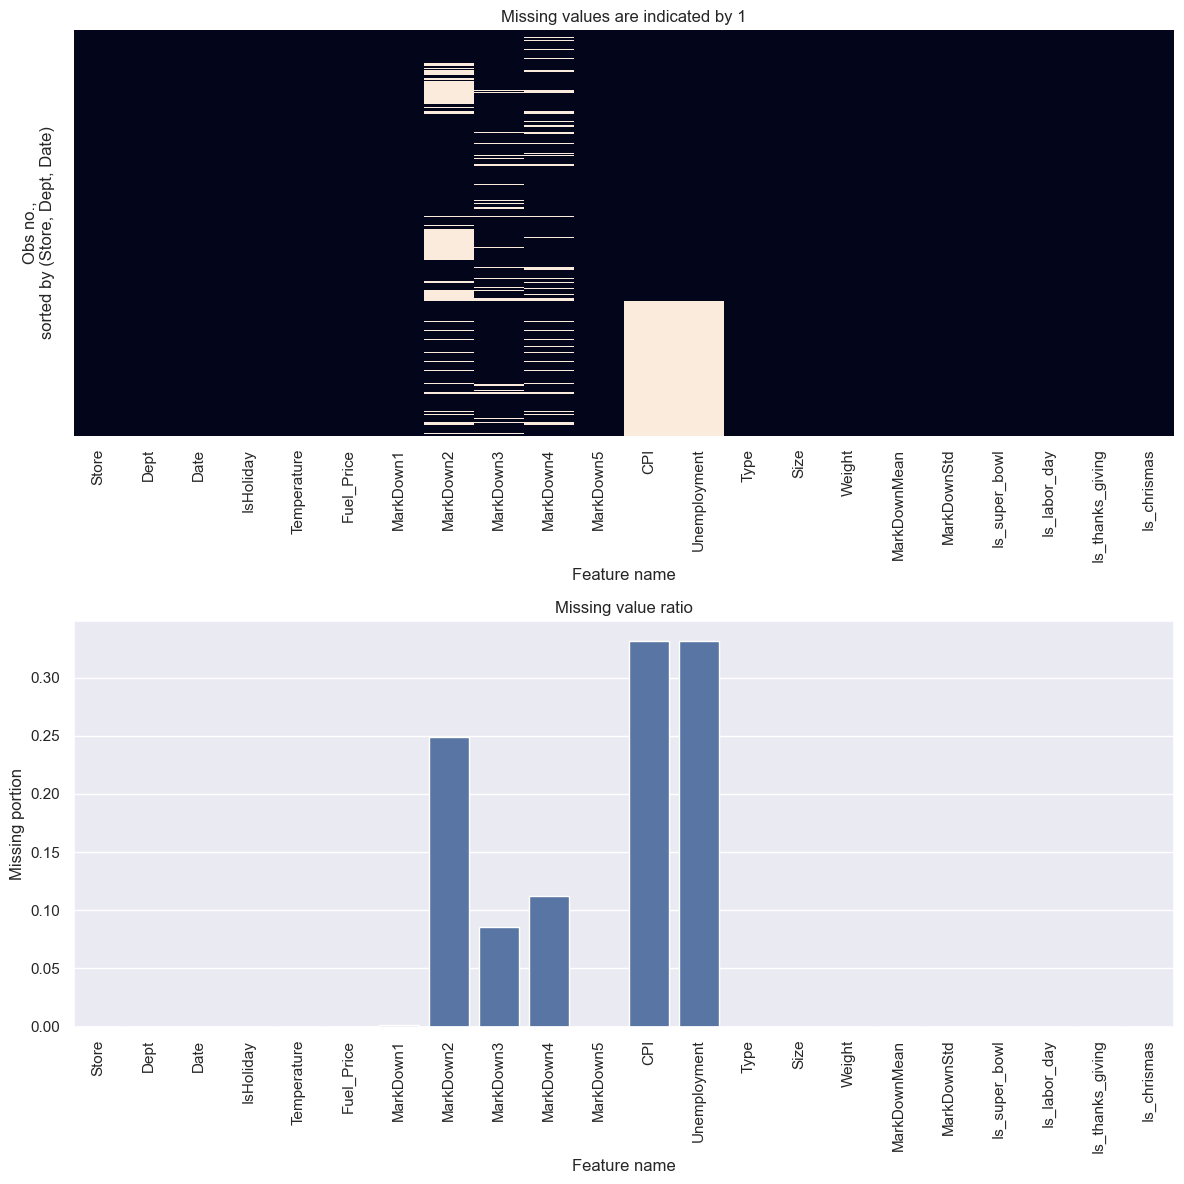

In [12]:
missing_vals_ratio, fig, axes = count_missing_values(test_df)